In [1]:
# data extractor program for solid state with different rh% 
#
# inputs:
# 	data_folder: where all your data files are stored
#	starting_string: which string signals that the data starts
#   unique_id: what is different amongst all the files
#
# outputs:
#   concatenated dataframe of all 

import pandas as pd
import os
import re
import seaborn as sns
import math
import matplotlib.pyplot as plt

%matplotlib inline


def read_file(path, file, last_n_lines, starting_string, unique_id):
    with open(path+file, 'r') as f:
        unique_id_value = 0
        columns = []
        while True:
            line = f.readline()
            # We assume that unique_id is only found once in the file
            if unique_id in line:
                unique_id_value = re.findall(r'(\d.\d\d\d)', line)[0]
                print(f'unique id in file: {unique_id_value}')
            if starting_string in line:
                columns = line.split('\t')[:-1]
                print(f'cols in file: {columns}')
                df = pd.read_csv(f, delimiter='\t', names=columns)
                df[f'{unique_id}'] = unique_id_value
                break
    return df.iloc[-last_n_lines:]

def get_rh_from_filename(filename):
    answer = re.findall(r'(\d\d)\%', filename)
    rh = answer[0]
    return rh 

def get_rxn_from_filename(filename):
    possibilities = ['OER', 'HOR', 'HER', 'ORR']
    for poss in possibilities:
        if poss in filename:
            return poss
    
    #answer = re.findall(r'(\S*M)\s(\S*)', filename)
    #concentration = answer[0][0]
    #electrolyte = answer[0][1]
    #return concentration, electrolyte

def read_all_files(path, last_n_lines, starting_string, unique_id):
    file_list = os.listdir(path)
    df = pd.DataFrame([])
    for filename in file_list:
        new_df = read_file(path, filename, last_n_lines, starting_string, unique_id)
        rh = get_rh_from_filename(filename)
        new_df['rh'] = rh
        rxn = get_rxn_from_filename(filename)
        new_df['rxn'] = rxn
        df = df.append(new_df)
    return df



In [2]:
path = '../Data/Microelectrodes/Toyota/'
last_n_lines = 100
starting_string = 'time/s'
unique_id = 'Ei (V)'

df = read_all_files(path, last_n_lines, starting_string, unique_id)
df

unique id in file: 0.262
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.272
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.282
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.292
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.302
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.312
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.322
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.332
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.342
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.352
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.362
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.412
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.462
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.200
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 0.210
cols in file: ['time/s', 'Ewe/V', 'I/

,time/s,Ewe/V,I/mA,Ei (V),rh,rxn
3363,336.727591,0.261208,-0.000024,0.262,75,HOR
3364,336.827591,0.261208,-0.000024,0.262,75,HOR
3365,336.927591,0.261174,-0.000024,0.262,75,HOR
3366,337.027591,0.261227,-0.000024,0.262,75,HOR
3367,337.127591,0.261178,-0.000024,0.262,75,HOR
...,...,...,...,...,...,...
5996,5998.608073,0.289258,0.000005,0.290,95,HOR
5997,5998.708073,0.289254,0.000005,0.290,95,HOR
5998,5998.808073,0.289235,0.000005,0.290,95,HOR
5999,5998.908073,0.289238,0.000005,0.290,95,HOR


In [3]:
# define area
diameter = 50
area = math.pi * (diameter)**2 / (4 * (10000)**2)

# get plot data
plot_data = df.groupby([unique_id, 'rh', 'rxn'], as_index=False).mean()
plot_data['I/mA'] = plot_data['I/mA']/area
#plot_data['Electrolyte'] = plot_data['concentration'].str.cat(plot_data['electrolyte'], sep=' ')
#plot_data['concentration_value'] = plot_data['concentration'].str.slice(stop=-1).astype('float')
plot_data = plot_data.sort_values(['rh'])
plot_data['rh'] = plot_data['rh'].astype('string')
plot_data[unique_id] = plot_data[unique_id].astype('float')
plot_data['rxn'] = plot_data['rxn'].astype('string')
plot_data.dtypes

Ei (V)    float64
rh         string
rxn        string
time/s    float64
Ewe/V     float64
I/mA      float64
dtype: object

Text(0.5, 0, '$E \\ vs. \\ RHE [V]$')

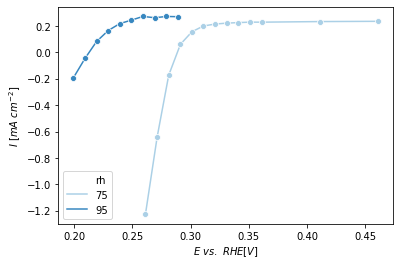

In [4]:
# # two plots

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['electrolyte']=='KHCO3'], 
#                     hue='Electrolyte', marker='o', palette='Blues', ax=axs[0])
# sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['electrolyte']=='KOH'], 
#                     hue='Electrolyte', marker='o', palette='Reds', ax=axs[1])

# four plots

palette = sns.color_palette("Blues", 2)

#fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['rxn']=='OER'], 
#                     hue='rh', marker='o', palette=palette, ax=axs[0,0], legend='full')
#sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['rxn']=='HER'], 
#                     hue='rh', marker='o', palette=palette, ax=axs[0,1], legend='full')
#sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['rxn']=='HOR'], 
#                     hue='rh', marker='o', palette=palette, ax=axs[1,0], legend='full')
#sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['rxn']=='ORR'], 
#                     hue='rh', marker='o', palette=palette, ax=axs[1,1], legend='full')

#ax1 = axs[0,0]
#ax1.set_title(r'OER')
#ax2 = axs[0,1]
#ax2.set_title(r'HER')
#ax3 = axs[1,0]
#ax3.set_title(r'HOR')
#ax4 = axs[1,1]
#ax4.set_title(r'ORR')

#charts = [ax1, ax2, ax3, ax4]
#for chart in charts:
#    chart.set_ylabel(r'$I \ [mA \ cm^{-2}]$')
#    chart.set_xlabel(r'$E \ vs. \ RHE \ [V]$')

#End four plots

#One plot
fig, ax = plt.subplots()

sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data, hue='rh', marker='o', palette=palette, legend='full')         
        
ax.set_ylabel(r'$I \ [mA \ cm^{-2}]$')
ax.set_xlabel(r'$E \ vs. \ RHE [V]$')
#ax.set_title(r'$75 \ \mu m \ Ir$')
# fig.savefig('Ir_OER_Naf_50%RH.png', dpi=500, bbox_to_inches='tight')

In [5]:
plot_data[plot_data['rxn']=='OER'].dtypes

Ei (V)    float64
rh         string
rxn        string
time/s    float64
Ewe/V     float64
I/mA      float64
dtype: object

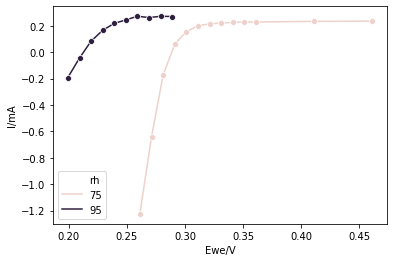

In [6]:
sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data, 
                     hue='rh', marker='o', legend='full')